
1.   Check which data sets are still available/connectable
2.   Table 1 (Number of databases from different cities)
3.   Fig 1 (Number of databases from different citie)
4.   Pie Chart Part 1
5.   Pie Chart Part 2
6.   Number of databases created each year, updated each year, total created by that year (2014-2023)
7.   Number of databases created each year, updated each year, total created by that year (All)



*   Number of databases created each year, updated each year, total created by that year (2014-2023)
*   Number of databases created each year, updated each year, total created by that year (All)
*   "Original Paper (2014)" VS "New Study (2023)"
*   Number of databases from different cities
*   Pie Chart Part 1
*   Pie Chart Part 2



In [1]:
import csv
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"
import pandas as pd

# # Read the content of the text file
# with open('urls.txt', 'r') as file:
#     data = file.read()

csv_file_path = 'fig1.csv'

with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)

  # # Split the content into lines
  # lines = data.split('\n')

  # Create a dictionary to store URLs and city names
  city_data = {}

  # Iterate through each line and extract the URL and city name
  for lines in csvFile:
      # if line.strip():  # Check if the line is not empty
        # parts = line.split(' ')
        if lines[4] == "website":
           continue
        url_city = lines[4]
        city = lines[5]
        # url_city, city = line.split(' ')
        city_data[city] = url_city

  # Print the dictionary
  # print(city_data)


# print(url)
for k,v in city_data.items():
    try:
      params = {
      "domains": v,
      "search_context": v,
      "limit": 5000
      }
      response = requests.get(url, params=params)
      data = response.json()
      count = len(data["results"])
      print(str(k) + "\tCount:" + str(count))
      df = pd.read_csv(csv_file_path)

      city_name_to_update = str(k)
      new_database_num = int(count)

      df.loc[df['city name long'] == city_name_to_update, 'databases'] = new_database_num
      df.loc[df['city name long'] == city_name_to_update, 'yes'] = 1

      df.to_csv(csv_file_path, index=False)
    except Exception as e:
        print(str(k) + "\tERROR")
        df = pd.read_csv(csv_file_path)

        city_name_to_update = str(k)
        new_database_num = int(count)

        # df.loc[df['city name long'] == city_name_to_update, 'databases'] = int(0)
        df.loc[df['city name long'] == city_name_to_update, 'yes'] = int(0)
        df.to_csv(csv_file_path, index=False)


Austin, TX	Count:19
Baltimore, MD	ERROR
Chicago, IL	Count:1659
De Leon, TX	ERROR
Edmonton, AB	Count:2150
New Orleans, LA	Count:234
San Francisco, CA	Count:1205
Seattle, WA	Count:859
New York City, NY	Count:3441
Honolulu, HI	Count:358
Somerville, MA	Count:42
Boston, MA	ERROR
Salt Lake City, UT	ERROR
Oakland, CA	ERROR
Madison, WI	ERROR
Kansas City, MO	Count:416
Raleigh, NC	ERROR
Redmond, WA	Count:47
Weatherford, TX	ERROR
Wellington, FL	ERROR


In [2]:
import pandas as pd

# Sample data
data = {'City Name': [],
        'No. of data sets in 2023': [],
        'No. of data sets in 2014': [],
        'Change in No. of data sets': [],
        'Status':[],
        'Top_three categories':[]
       }

with open('fig1.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[1] == "0":
          data["Status"].append("Website disappeared")
          data["Top_three categories"].append("N/A")
      elif lines[3] == "0":
          data["Status"].append("Website not connectable")
          data["Top_three categories"].append("N/A")
      else:
          data["Status"].append("Website is working")
          url = "https://api.us.socrata.com/api/catalog/v1"
          domain = lines[4]

          params = {
              "domains": domain,
              "search_context": domain,
              "limit": 5000
          }

          response = requests.get(url, params=params)
          data2 = response.json()
          categories = {}
          for item in data2['results']:
              # print(item["classification"]["categories"])
              for c in item["classification"]["categories"]:
                if c in categories:
                    categories[c] += 1
                else:
                    categories[c] = 1
          # print(categories)
          sorted_data = sorted(categories.items(), key=lambda x: x[1], reverse=True)
          # print(sorted_data)
          top_three_names = [category for category, value in sorted_data[:3]]
          res = ','.join(top_three_names)
          data["Top_three categories"].append(res)

      data["City Name"].append(lines[5])
      data["No. of data sets in 2023"].append(int(lines[1]))
      data["No. of data sets in 2014"].append(int(lines[6]))
      data["Change in No. of data sets"].append(int(lines[1]) - int(lines[6]))

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by the 'Age' column
df_sorted_desc = df.sort_values(by='No. of data sets in 2023', ascending=True)
df_sorted_desc = df_sorted_desc.reset_index(drop=True)
df_sorted_desc['S. No.'] = df_sorted_desc.index + 1
df_sorted_desc = df_sorted_desc[['S. No.', 'City Name', 'No. of data sets in 2023',"No. of data sets in 2014","Change in No. of data sets",'Top_three categories','Status']]
print(df_sorted_desc.to_string(index=False))


# df_sorted_desc.index = df_sorted_desc.index + 1



# print(df_sorted_desc)

 S. No.          City Name  No. of data sets in 2023  No. of data sets in 2014  Change in No. of data sets                          Top_three categories                  Status
      1     Wellington, FL                         0                        30                         -30                                           N/A     Website disappeared
      2    Weatherford, TX                         0                        71                         -71                                           N/A     Website disappeared
      3        De Leon, TX                         0                        12                         -12                                           N/A     Website disappeared
      4         Austin, TX                        19                       216                        -197                   health,economy,demographics      Website is working
      5 Salt Lake City, UT                        21                        39                         -18         

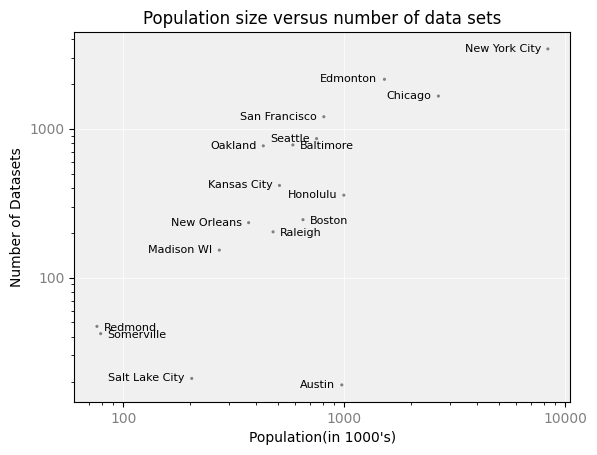

In [3]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

cities = []
population = []
datasets = []

with open('fig1.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[1] == "0":
          continue
      cities.append(lines[0])
      population.append(int(lines[2])  // 1000 )
      datasets.append(int(lines[1]))

plt.rcParams['axes.facecolor'] = '#f0f0f0'


# Create the scatter plot
plt.scatter(population, datasets, color='grey', label='Cities', s = 5, edgecolor='none', zorder=2)
# plt.scatter(population, datasets, color='grey', s = 5, edgecolor='none', zorder=2)

# Add labels and title
plt.xlabel("Population(in 1000\'s)")
plt.ylabel('Number of Datasets')
plt.title('Population size versus number of data sets')



# Add city names as annotations
for i, city in enumerate(cities):
    if city == "Baltimore" or city == "Boston" or city == "Raleigh" or city == "Somerville" or city == "Redmond":
      plt.annotate(city, (population[i], datasets[i]), textcoords="offset points", xytext=(5, -3), ha='left', fontsize = 8)

    else:
      plt.annotate(city, (population[i], datasets[i]), textcoords="offset points", xytext=(-5, -2), ha='right', fontsize = 8)



plt.xscale('log')
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xticks(color="grey")
plt.yticks(color="grey")
plt.grid( color='white', linestyle='-', linewidth=0.5)

plt.show()

In [4]:
##Extracting file type -- tabular vs other
##Part 1: This creates a txt file named "cityofnewyork_filetype.txt" in the same directory the jupyter notebook is in. The txt file contains data ID, data file type, and data type format for non-tabular data.
#https://dev.socrata.com/docs/other/discovery.html#?route=overview

import requests

# Base URL for the Socrata Discovery API
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"
filename = domain.split('.')[1] + "_filetype.txt"

# Initialize parameters for pagination
params = {
    "domains": domain,
    "limit": 100,  # Maximum number of results per page
    "offset": 0    # Start at the beginning
}

# Fetch and write data to the file
with open(filename, 'w') as file:
    while True:
        response = requests.get(url, params=params)
        data = response.json()

        # Write each item to the file
        for item in data['results']:
            file.write(item['resource']['id'] + " - " + item['resource']['lens_view_type'] + " - " + str(item['resource']['blob_mime_type'])+"\n")

        # Check if there are more pages
        if len(data['results']) < params['limit']:
            break  # Exit loop if no more results to fetch

        # Increase the offset for the next iteration
        params['offset'] += params['limit']

Percentage of 'tabular' filetypes: 83.64%
Percentage of 'pdf' filetypes: 0.70%
Percentage of 'zip' filetypes: 9.50%
Percentage of 'other' filetypes: 6.16%


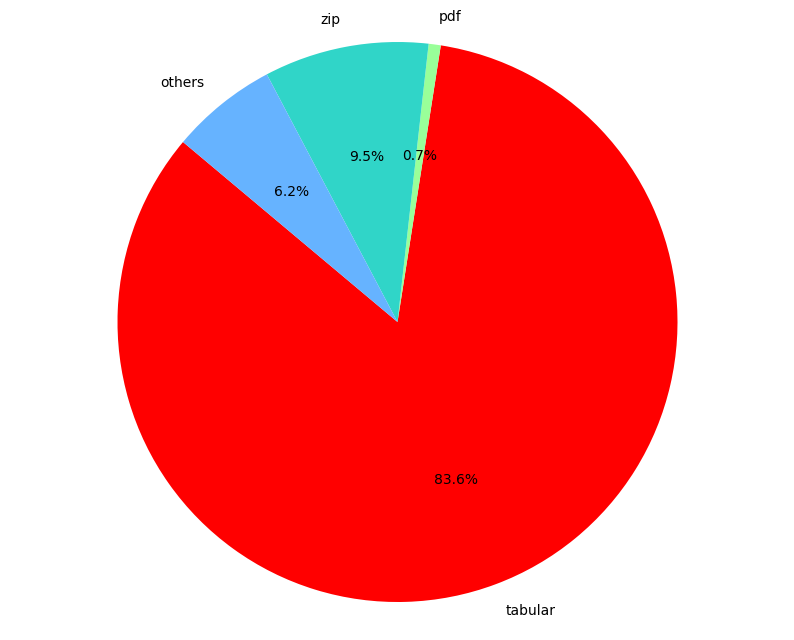

In [5]:
#This code snippet reads the info from the txt file created in part 1, and creates the pie chart using matplotlib:

import matplotlib.pyplot as plt

filename = "cityofnewyork_filetype.txt"

# Initialize counters
total_count = 0
tabular_count = 0
pdf_count = 0
zip_count = 0
other_count = 0

# Process each line in the file
with open(filename, 'r') as file:
    for line in file:
        total_count += 1
        # Check if the line contains 'tabular'
        if 'tabular' in line:
            tabular_count += 1
        elif 'pdf' in line:
            pdf_count += 1
        elif 'zip' in line:
            zip_count += 1
        else:
            other_count += 1

# Calculate the percentage (avoid division by zero)
tabular_percentage = (tabular_count / total_count * 100) if total_count else 0
zip_percentage = (zip_count / total_count * 100) if total_count else 0
pdf_percentage = (pdf_count / total_count * 100) if total_count else 0
other_percentage = (other_count / total_count * 100) if total_count else 0

# Print the result
print(f"Percentage of 'tabular' filetypes: {tabular_percentage:.2f}%")
print(f"Percentage of 'pdf' filetypes: {pdf_percentage:.2f}%")
print(f"Percentage of 'zip' filetypes: {zip_percentage:.2f}%")
print(f"Percentage of 'other' filetypes: {other_percentage:.2f}%")

# Labels for the sections
labels = ['tabular', 'pdf', 'zip', 'others']

# Sizes for each section
sizes = [tabular_percentage, pdf_percentage, zip_percentage, other_percentage]

# Colors for each section
colors = ['#ff0000','#99ff99','#30D5C8','#66b3ff']

# Explode the 1st slice (Tabular)
explode = (0, 0, 0, 0)

plt.figure(figsize=(10, 8))
# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

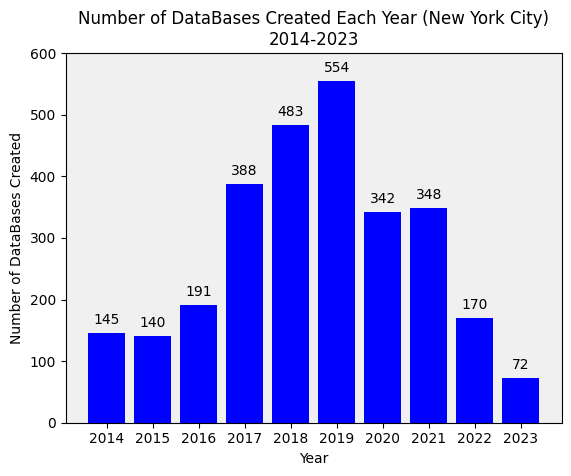

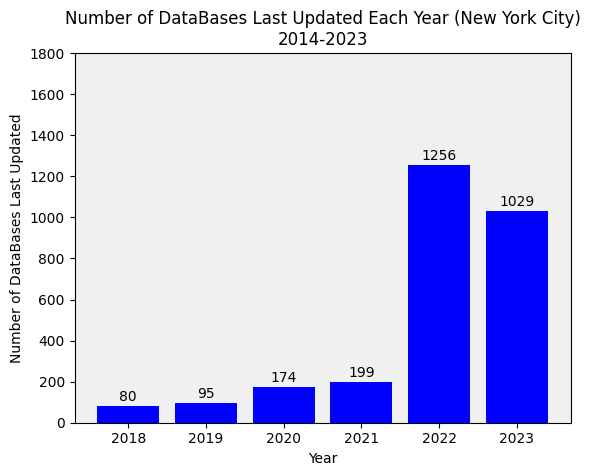

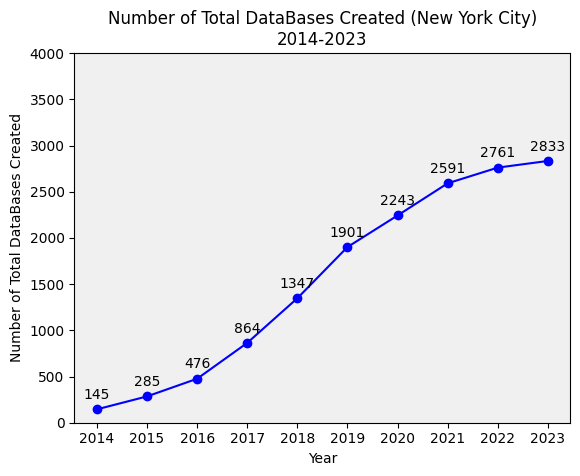

In [6]:
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

# print(data)

year_count = {}
year2_count = {}
count = 0;
for item in data['results']:
    year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
    year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
    if year >= 2014 and year <= 2023:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
        if year2 in year2_count:
            year2_count[year2] += 1
        else:
            year2_count[year2] = 1
        count = count + 1
# print (year_count)
# print(count)

import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (New York City)'+ '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,600)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (New York City)' + '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1800)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (New York City)' + '\n' + "2014-2023")
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,4000)
plt.show()

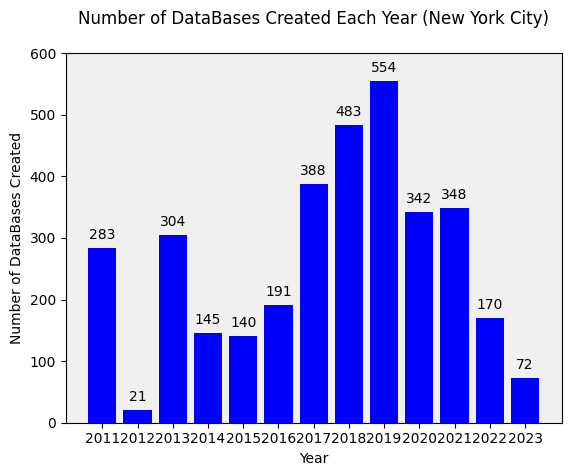

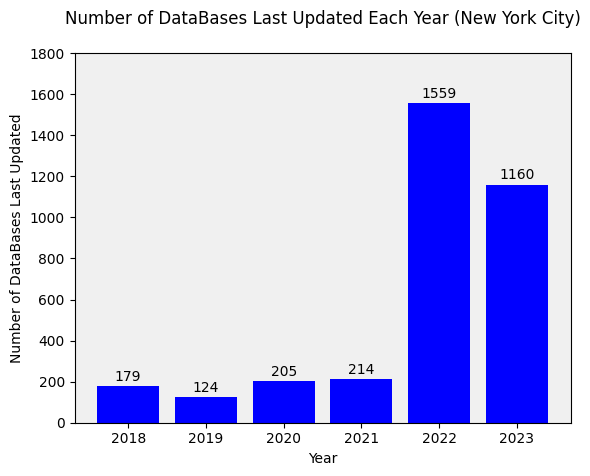

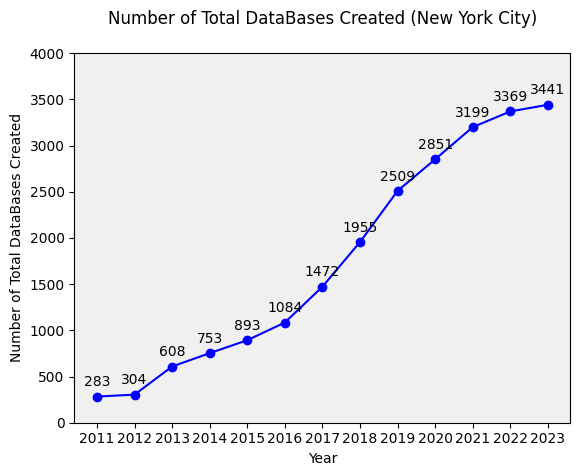

In [7]:
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

year_count = {}
year2_count = {}
count = 0;
for item in data['results']:
    year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
    year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
    if year in year_count:
        year_count[year] += 1
    else:
        year_count[year] = 1
    if year2 in year2_count:
        year2_count[year2] += 1
    else:
        year2_count[year2] = 1
    count = count + 1
# print (year_count)
# print(count)

import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (New York City)'+ '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,600)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (New York City)' + '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1800)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (New York City)' + '\n')
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,4000)
plt.show()

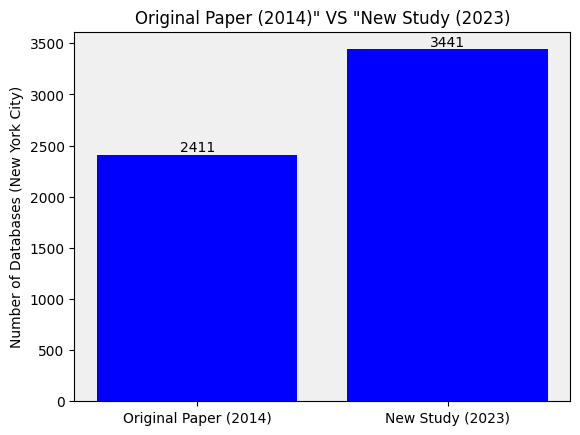

In [8]:
import matplotlib.pyplot as plt
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

count = 0;
for item in data['results']:
    count = count + 1


# Sample data
categories = ['Original Paper (2014)', 'New Study (2023)']
values = [2411,count]

# Creating a bar chart
plt.bar(categories, values, color='blue')

# Adding labels and title
plt.ylabel('Number of Databases (New York City)')
plt.title('Original Paper (2014)" VS "New Study (2023)')

for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

# Display the chart
plt.show()